# Prediction on Dropseq Dataset

## Imports

In [1]:
#Importing libraries
from Utils.data_analysis import *
from Utils.processing import *
from Utils.dim_reduction import *
from Utils.modeling import *

from sklearn.model_selection import train_test_split
import warnings, csv
warnings.simplefilter("ignore")
%matplotlib inline     
sns.set_theme(color_codes=True)

processing.py loaded
data_analysis.py loaded
dim_reduction.py loaded
modeling.py loaded successfully


In [2]:
df_HCC_model = pd.read_csv("Data/dropseq_data/HCC1806_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_MCF_model = pd.read_csv("Data/dropseq_data/MCF7_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)

y_HCC = get_oxia(df_HCC_model.T)
X_HCC = df_HCC_model.T

y_MCF = get_oxia(df_MCF_model.T)
X_MCF = df_MCF_model.T

X_HCC_tr, X_HCC_ts, y_HCC_tr, y_HCC_ts = train_test_split(X_HCC, y_HCC, test_size=0.2, random_state=42)
X_MCF_tr, X_MCF_ts, y_MCF_tr, y_MCF_ts = train_test_split(X_MCF, y_MCF, test_size=0.2, random_state=42)

## Supervised Dimensionality Reduction

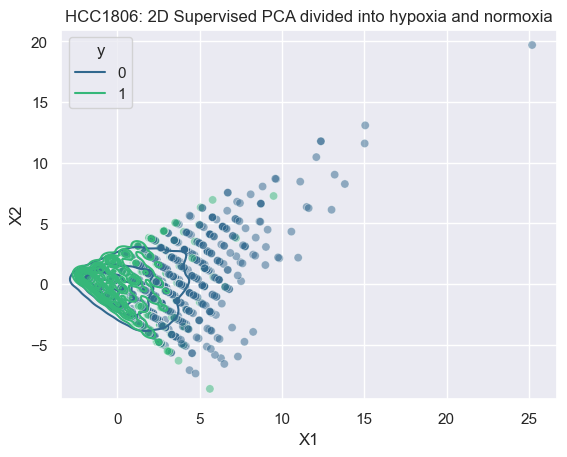

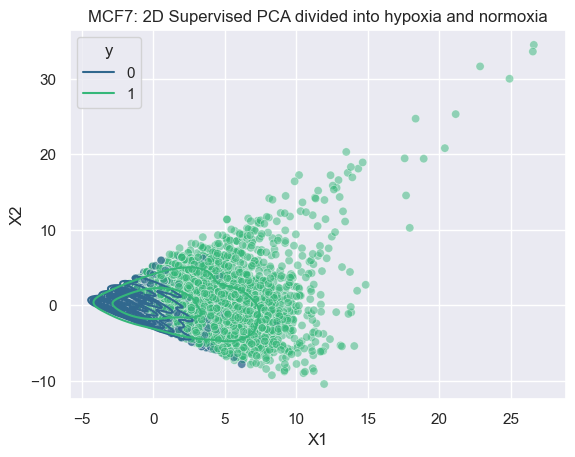

Accuracy of HCC1806 PCA:  0.7568947906026557
Accuracy of MCF7 PCA:  0.8536754507628294


In [3]:
X_HCC_pca_supervised, HCC_pca = supervised_pca(X_HCC_tr, y_HCC_tr)
plot_2d(X_HCC_pca_supervised, y_HCC_tr, 'HCC1806', 'Supervised PCA')

X_MCF_pca_supervised, MCF_pca = supervised_pca(X_MCF_tr, y_MCF_tr)
plot_2d(X_MCF_pca_supervised, y_MCF_tr, 'MCF7', 'Supervised PCA')

y_HCC_pca = dim_red_predictor(X_HCC_pca_supervised[['X1', 'X2']], y_HCC_tr, X_HCC_ts, HCC_pca)
y_MCF_pca = dim_red_predictor(X_MCF_pca_supervised[['X1', 'X2']], y_MCF_tr, X_MCF_ts, MCF_pca)

del X_HCC_pca_supervised, X_MCF_pca_supervised

print("Accuracy of HCC1806 PCA: ", accuracy_score(y_HCC_ts, y_HCC_pca))
print("Accuracy of MCF7 PCA: ", accuracy_score(y_MCF_ts, y_MCF_pca))

In [4]:
# X_HCC_tsne_supervised, HCC_tsne = supervised_tsne(X_HCC_tr, y_HCC_tr)
# plot_2d(X_HCC_tsne_supervised, y_HCC_tr, 'HCC1806', 'Supervised t-SNE')

# X_MCF_tsne_supervised, MCF_tsne = supervised_tsne(X_MCF_tr, y_MCF_tr)
# plot_2d(X_MCF_tsne_supervised, y_MCF_tr, 'MCF7', 'Supervised t-SNE')

# y_HCC_tsne = dim_red_predictor(X_HCC_tsne_supervised[['X1', 'X2']], y_HCC_tr, X_HCC_ts, HCC_tsne)
# y_MCF_tsne = dim_red_predictor(X_MCF_tsne_supervised[['X1', 'X2']], y_MCF_tr, X_MCF_ts, MCF_tsne)

# del X_HCC_tsne_supervised, X_MCF_tsne_supervised

# print("Accuracy of HCC1806 t-SNE: ", accuracy_score(y_HCC_ts, y_HCC_tsne))
# print("Accuracy of MCF7 t-SNE: ", accuracy_score(y_MCF_ts, y_MCF_tsne))

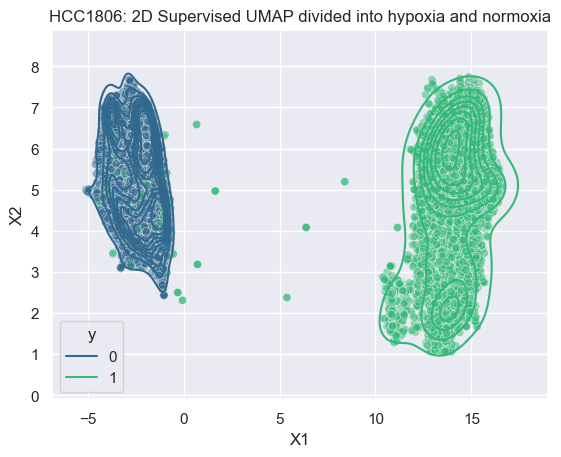

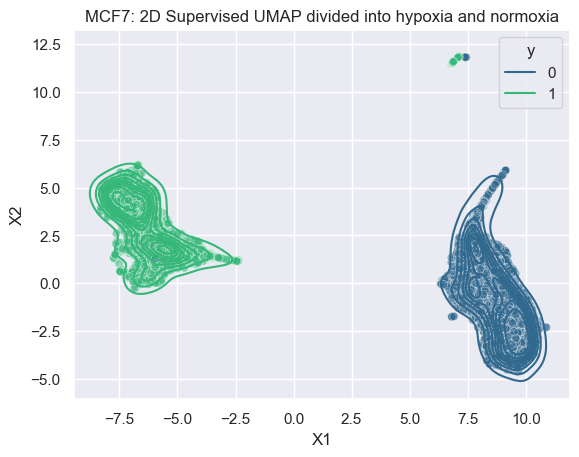

Accuracy of HCC1806 UMAP:  0.5481784133469527
Accuracy of MCF7 UMAP:  0.8867313915857605


In [5]:
X_HCC_umap_supervised, HCC_umap = supervised_umap(X_HCC_tr, y_HCC_tr)
plot_2d(X_HCC_umap_supervised, y_HCC_tr, 'HCC1806', 'Supervised UMAP')

X_MCF_umap_supervised, MCF_umap = supervised_umap(X_MCF_tr, y_MCF_tr)
plot_2d(X_MCF_umap_supervised, y_MCF_tr, 'MCF7', 'Supervised UMAP')

y_HCC_umap = dim_red_predictor(X_HCC_umap_supervised[['X1', 'X2']], y_HCC_tr, X_HCC_ts, HCC_umap)
y_MCF_umap = dim_red_predictor(X_MCF_umap_supervised[['X1', 'X2']], y_MCF_tr, X_MCF_ts, MCF_umap)

del X_HCC_umap_supervised, X_MCF_umap_supervised

print("Accuracy of HCC1806 UMAP: ", accuracy_score(y_HCC_ts, y_HCC_umap))
print("Accuracy of MCF7 UMAP: ", accuracy_score(y_MCF_ts, y_MCF_umap))

## Clustering

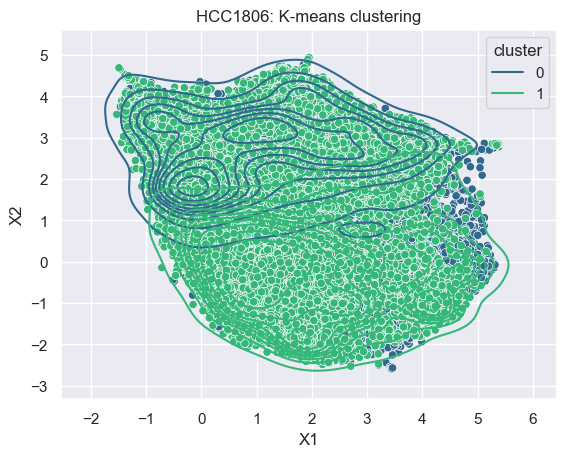

Silhouette Score: 0.050
Accuracy: 0.588


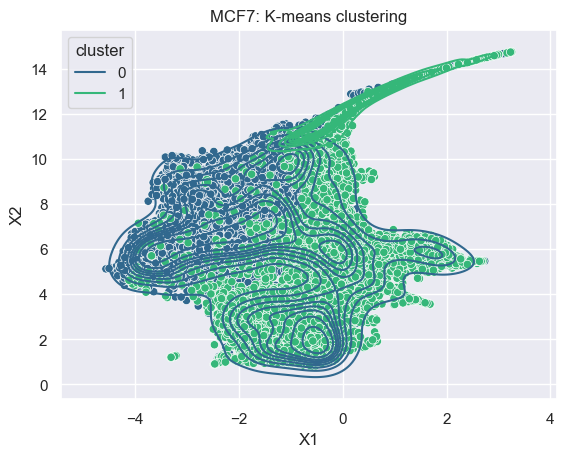

Silhouette Score: 0.317
Accuracy: 0.546


In [6]:
kmeans_HCC = KMeans(n_clusters=2, random_state=1).fit(X_HCC)
kmeans_HCC_score = clustering_plot(X_HCC, y_HCC, kmeans_HCC.labels_, 'HCC1806: K-means clustering')

kmeans_MCF = KMeans(n_clusters=2, random_state=42).fit(X_MCF)
kmeans_MCF_score = clustering_plot(X_MCF, y_MCF, kmeans_MCF.labels_, 'MCF7: K-means clustering')

del kmeans_HCC, kmeans_MCF

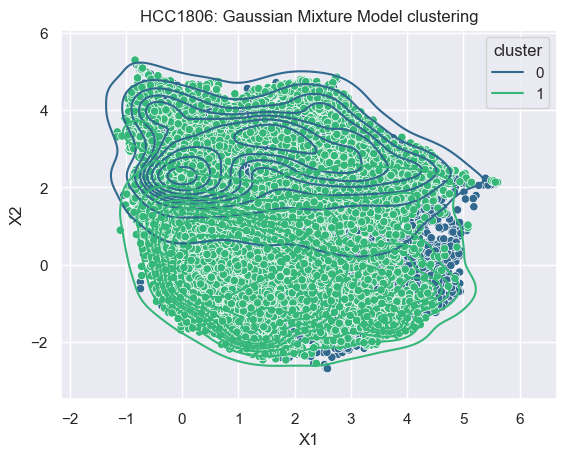

Silhouette Score: 0.044
Accuracy: 0.597


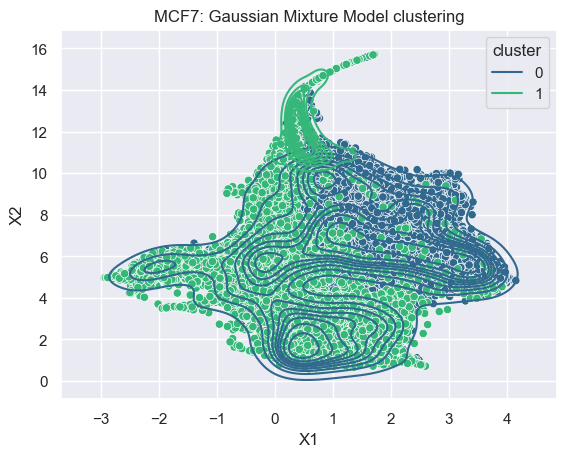

Silhouette Score: 0.317
Accuracy: 0.546


In [7]:
gmm_HCC = GaussianMixture(n_components=2, random_state=1).fit(X_HCC)
gmm_HCC_score = clustering_plot(X_HCC, y_HCC, gmm_HCC.predict(X_HCC), 'HCC1806: Gaussian Mixture Model clustering')

gmm_MCF = GaussianMixture(n_components=2).fit(X_MCF)
gmm_MCF_score = clustering_plot(X_MCF, y_MCF, gmm_MCF.predict(X_MCF), 'MCF7: Gaussian Mixture Model clustering')

del gmm_HCC, gmm_MCF

In [10]:
# dbscan_HCC = dbscan_labels(X_HCC)
# dbscan_HCC_score = clustering_plot(X_HCC, y_HCC, dbscan_HCC, 'HCC1806: DBSCAN clustering')

# dbscan_MCF = dbscan_labels(X_MCF)
# dbscan_MCF_score = clustering_plot(X_MCF, y_MCF, dbscan_MCF, 'MCF7: DBSCAN clustering')

# del dbscan_HCC, dbscan_MCF

dbscan_HCC_score, dbscan_MCF_score = 0, 0

In [12]:
# spectral_HCC = SpectralClustering(n_clusters=2, random_state=1).fit(X_HCC)
# spectral_HCC_score = clustering_plot(X_HCC, y_HCC, spectral_HCC.labels_, 'HCC1806: Spectral clustering')

# spectral_MCF = SpectralClustering(n_clusters=2, random_state=42).fit(X_MCF)
# spectral_MCF_score = clustering_plot(X_MCF, y_MCF, spectral_MCF.labels_, 'MCF7: Spectral clustering')

# del spectral_HCC, spectral_MCF

spectral_HCC_score, spectral_MCF_score = 0, 0

## Logistic Regression

In [13]:
y_HCC_lr = logistic_regression(X_HCC_tr, y_HCC_tr, X_HCC_ts)
y_MCF_lr = logistic_regression(X_MCF_tr, y_MCF_tr, X_MCF_ts)

print("Accuracy of HCC1806 Logistic Regression: ", accuracy_score(y_HCC_ts, y_HCC_lr))
print("Accuracy of MCF7 Logistic Regression: ", accuracy_score(y_MCF_ts, y_MCF_lr))

Accuracy of HCC1806 Logistic Regression:  0.95097037793667
Accuracy of MCF7 Logistic Regression:  0.9764216366158114


## Support Vector Machine

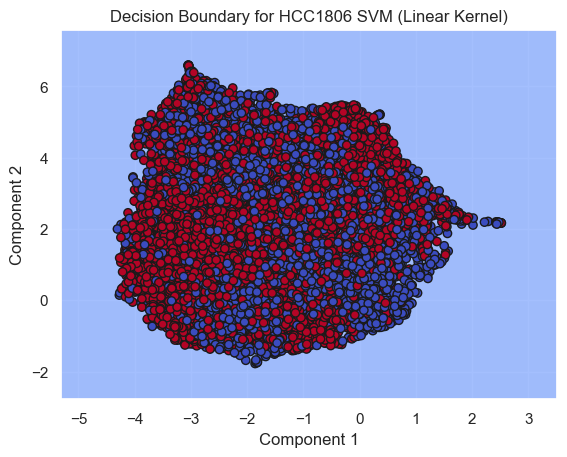

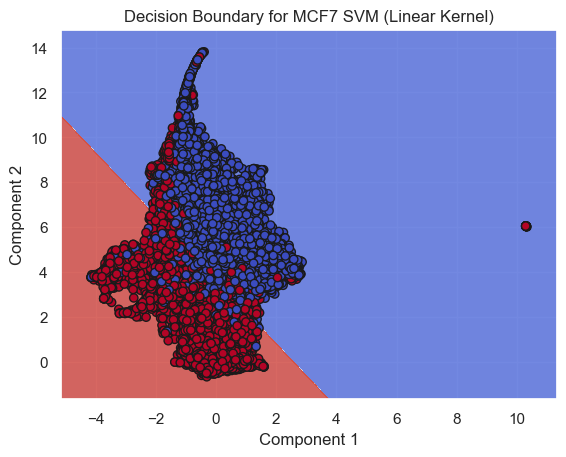

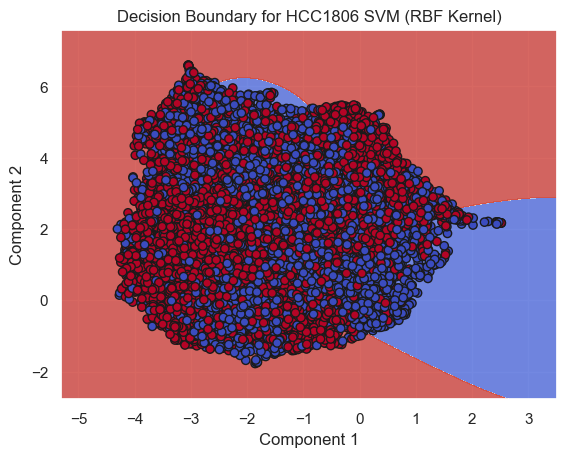

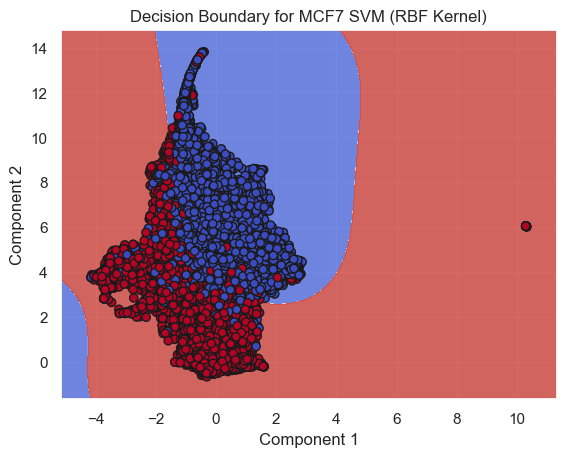

In [14]:
umap = UMAP(n_components=2, random_state=42)
X_HCC_tr_2d = umap.fit_transform(X_HCC_tr)
X_HCC_ts_2d = umap.fit_transform(X_HCC_ts)
X_MCF_tr_2d = umap.fit_transform(X_MCF_tr)
X_MCF_ts_2d = umap.fit_transform(X_MCF_ts)

y_HCC_svm, HCC_svm_lin = svm(X_HCC_tr_2d, y_HCC_tr, X_HCC_ts_2d)
y_MCF_svm, MCF_svm_lin = svm(X_MCF_tr_2d, y_MCF_tr, X_MCF_ts_2d)

plot_decision_boundary(X_HCC_tr_2d, y_HCC_tr, HCC_svm_lin, 'Decision Boundary for HCC1806 SVM (Linear Kernel)')
plot_decision_boundary(X_MCF_tr_2d, y_MCF_tr, MCF_svm_lin, 'Decision Boundary for MCF7 SVM (Linear Kernel)')

y_HCC_svm_rbf, HCC_svm_rbf = svm(X_HCC_tr_2d, y_HCC_tr, X_HCC_ts_2d, kernel='rbf')
y_MCF_svm_rbf, MCF_svm_rbf = svm(X_MCF_tr_2d, y_MCF_tr, X_MCF_ts_2d, kernel='rbf')

plot_decision_boundary(X_HCC_tr_2d, y_HCC_tr, HCC_svm_rbf, 'Decision Boundary for HCC1806 SVM (RBF Kernel)')
plot_decision_boundary(X_MCF_tr_2d, y_MCF_tr, MCF_svm_rbf, 'Decision Boundary for MCF7 SVM (RBF Kernel)')

del X_HCC_tr_2d, X_HCC_ts_2d, X_MCF_tr_2d, X_MCF_ts_2d, HCC_svm_lin, MCF_svm_lin, HCC_svm_rbf, MCF_svm_rbf

In [15]:
y_HCC_svm, HCC_svm_lin = svm(X_HCC_tr, y_HCC_tr, X_HCC_ts)
y_MCF_svm, MCF_svm_lin = svm(X_MCF_tr, y_MCF_tr, X_MCF_ts)

print("Accuracy of HCC1806 SVM: ", accuracy_score(y_HCC_ts, y_HCC_svm))
print("Accuracy of MCF7 SVM: ", accuracy_score(y_MCF_ts, y_MCF_svm))

y_HCC_svm_rbf, HCC_svm_rbf = svm(X_HCC_tr, y_HCC_tr, X_HCC_ts, kernel='rbf')
y_MCF_svm_rbf, MCF_svm_rbf = svm(X_MCF_tr, y_MCF_tr, X_MCF_ts, kernel='rbf')

print("Accuracy of HCC1806 SVM with RBF kernel: ", accuracy_score(y_HCC_ts, y_HCC_svm_rbf))
print("Accuracy of MCF7 SVM with RBF kernel: ", accuracy_score(y_MCF_ts, y_MCF_svm_rbf))

del HCC_svm_lin, MCF_svm_lin, HCC_svm_rbf, MCF_svm_rbf

Accuracy of HCC1806 SVM:  0.9414368403132448
Accuracy of MCF7 SVM:  0.9687933425797504
Accuracy of HCC1806 SVM with RBF kernel:  0.9605039155600953
Accuracy of MCF7 SVM with RBF kernel:  0.9798890429958391


## Random Forest

In [16]:
y_HCC_rf = random_forest(X_HCC_tr, y_HCC_tr, X_HCC_ts)
y_MCF_rf = random_forest(X_MCF_tr, y_MCF_tr, X_MCF_ts)

print("Accuracy of HCC1806 Random Forest: ", accuracy_score(y_HCC_ts, y_HCC_rf))
print("Accuracy of MCF7 Random Forest: ", accuracy_score(y_MCF_ts, y_MCF_rf))

Accuracy of HCC1806 Random Forest:  0.8260129383724889
Accuracy of MCF7 Random Forest:  0.9207119741100324


## Multi-Layer Perceptron

In [17]:
y_HCC_nn = neural_network(X_HCC_tr, y_HCC_tr, X_HCC_ts)
y_MCF_nn = neural_network(X_MCF_tr, y_MCF_tr, X_MCF_ts)

print("Accuracy of HCC1806 Neural Network: ", accuracy_score(y_HCC_ts, y_HCC_nn))
print("Accuracy of MCF7 Neural Network: ", accuracy_score(y_MCF_ts, y_MCF_nn))

Accuracy of HCC1806 Neural Network:  0.947906026557712
Accuracy of MCF7 Neural Network:  0.9782709200184928


## Results

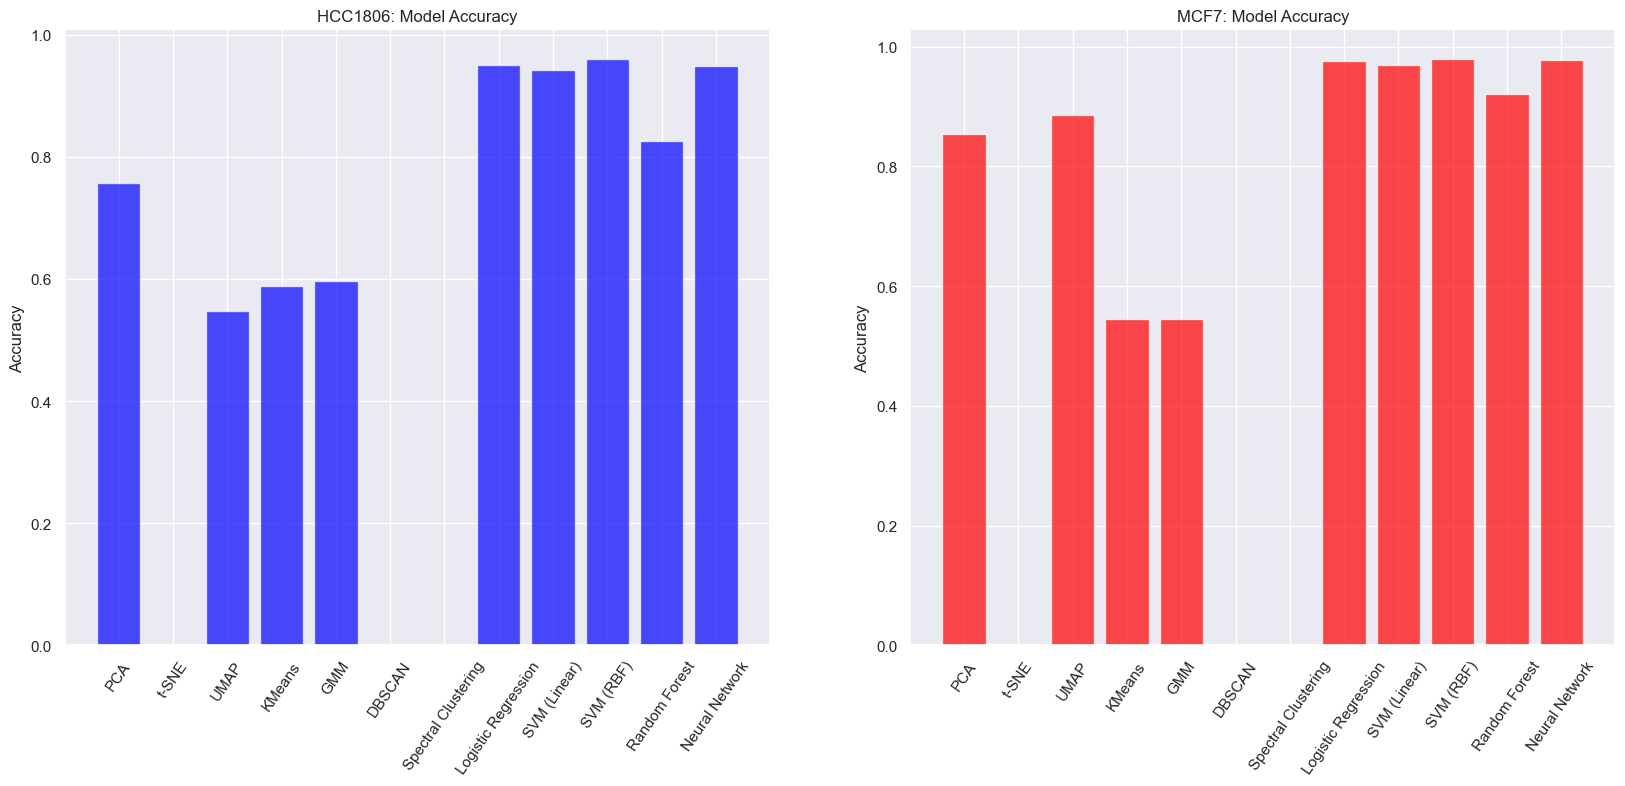

In [18]:
spca_HCC_score =accuracy_score(y_HCC_ts, y_HCC_pca)
spca_MCF_score = accuracy_score(y_MCF_ts, y_MCF_pca)

# stsne_HCC_score = accuracy_score(y_HCC_ts, y_HCC_tsne)
# stsne_MCF_score = accuracy_score(y_MCF_ts, y_MCF_tsne)
stsne_HCC_score = 0
stsne_MCF_score = 0

sumap_HCC_score = accuracy_score(y_HCC_ts, y_HCC_umap)
sumap_MCF_score = accuracy_score(y_MCF_ts, y_MCF_umap)

lr_HCC_score = accuracy_score(y_HCC_ts, y_HCC_lr)
lr_MCF_score = accuracy_score(y_MCF_ts, y_MCF_lr)

svm_HCC_lin_score = accuracy_score(y_HCC_ts, y_HCC_svm)
svm_MCF_lin_score = accuracy_score(y_MCF_ts, y_MCF_svm)

svm_HCC_rbf_score = accuracy_score(y_HCC_ts, y_HCC_svm_rbf)
svm_MCF_rbf_score = accuracy_score(y_MCF_ts, y_MCF_svm_rbf)

rf_HCC_score = accuracy_score(y_HCC_ts, y_HCC_rf)
rf_MCF_score = accuracy_score(y_MCF_ts, y_MCF_rf)

nn_HCC_score = accuracy_score(y_HCC_ts, y_HCC_nn)
nn_MCF_score = accuracy_score(y_MCF_ts, y_MCF_nn)

plot_models(spca_HCC_score, stsne_HCC_score, sumap_HCC_score, kmeans_HCC_score, gmm_HCC_score, 
            dbscan_HCC_score, spectral_HCC_score, lr_HCC_score, svm_HCC_lin_score, svm_HCC_rbf_score, 
            rf_HCC_score, nn_HCC_score, spca_MCF_score, stsne_MCF_score, sumap_MCF_score, 
            kmeans_MCF_score, gmm_MCF_score, dbscan_MCF_score, spectral_MCF_score, lr_MCF_score, 
            svm_MCF_lin_score, svm_MCF_rbf_score, rf_MCF_score, nn_MCF_score)